# Support Vector Machine

In [1]:
import numpy as np 

from pylearn_ml191.svm import KernelSVM
from sklearn.svm import SVC 

import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Ignore warnings
import warnings 
warnings.filterwarnings("ignore")

# Fixed random seed
RANDOM_SEED = 21

## 1. Linear Classification with SVM

### 1.1 Data Generation

In [2]:
means = [[2, 2], [5, 2]]
cov = [[.5, 0.], [0., .5]]

# Numbers of sample of each class 
N = 50

X_1 = np.random.multivariate_normal(means[0], cov, N)
X_2 = np.random.multivariate_normal(means[1], cov, N)

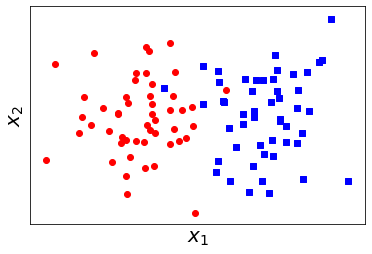

In [3]:
# Visualize generated data 
plt.scatter(X_1[:, 0], X_1[:, 1], c='red', marker='o', alpha=1)
plt.scatter(X_2[:, 0], X_2[:, 1], c='blue', marker='s', alpha=1)
plt.xticks([])
plt.yticks([])
plt.xlabel("$x_1$", fontsize = 20)
plt.ylabel("$x_2$", fontsize = 20)
plt.show()

In [4]:
X = np.concatenate((X_1, X_2), axis=0)
y = np.concatenate((-np.ones((N, 1)), np.ones((N,1))), axis=0)

## 1.2 Classification

#### 1.2.1 Using Kernel SVM in pylearn_ml191

In [5]:
model = KernelSVM(kernel="linear", C=0.5, atol=1e-3)
model.fit(X, y)

#### 1.2.2 Using SVC

In [6]:
svc = SVC(kernel="linear", C=0.5, tol=1e-3)
svc.fit(X, y)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [7]:
# SO SÁNH NGHIỆM BẰNG CÔNG THỨC VÀ NGHIỆM ĐẠT ĐƯỢC BẰNG CVXOPT
print("--------------NGHIỆM BẰNG THƯ VIỆN SVC -------------------")
print("Support vectors: ")
print(svc.support_vectors_)
print("w:", svc.coef_)
print("b:", svc.intercept_)
print("----------------------------------------------------------")
print("----------  NGHIỆM BẰNG pylearn_ml191 ---------")
print("Support vectors: ")
print(model.support_vectors_)
print("w:", model.w)
print("b:", model.b)
print("----------------------------------------------------------")

--------------NGHIỆM BẰNG THƯ VIỆN SVC -------------------
Support vectors: 
[[2.98233246 1.51648109]
 [4.02217881 2.43808941]
 [3.27184521 2.12490292]
 [2.89304926 2.75849568]
 [3.12229505 1.55894695]
 [3.34199792 0.19987022]
 [3.29153835 1.78232197]
 [3.03766608 2.0646606 ]
 [2.76722727 3.29319263]
 [3.85628384 2.5807131 ]
 [2.64657062 2.4752494 ]
 [3.79235186 0.93986441]
 [4.11989502 0.78745999]
 [3.83976093 2.77718338]
 [3.84291749 1.1479114 ]
 [3.51722539 2.18035072]
 [3.50840698 2.87469777]
 [3.95700814 2.22727287]]
w: [[1.88627892 0.22837058]]
b: [-6.97210909]
----------------------------------------------------------
----------  NGHIỆM BẰNG pylearn_ml191 ---------
Support vectors: 
[[2.98233246 1.51648109]
 [4.02217881 2.43808941]
 [3.27184521 2.12490292]
 [2.89304926 2.75849568]
 [3.12229505 1.55894695]
 [3.34199792 0.19987022]
 [3.29153835 1.78232197]
 [3.03766608 2.0646606 ]
 [2.76722727 3.29319263]
 [3.85628384 2.5807131 ]
 [2.64657062 2.4752494 ]
 [3.79235186 0.93986441]
 

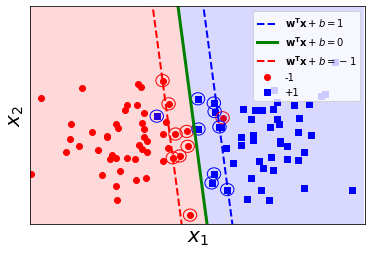

In [8]:
#------------ Visualize results in 2-D Dimensions -----------#

# Some settings 
step_size = 0.025
x_min = 0
x_max = 7
y_min = 0
y_max = 5

x_1 = np.arange(x_min, x_max, step_size)
x_2 = np.arange(y_min, y_max, step_size)

xx, yy = np.meshgrid(x_1, x_2)

xx1 = xx.ravel().reshape(xx.size, 1)
yy1 = yy.ravel().reshape(yy.size, 1)

X_use = np.concatenate((xx1, yy1), axis=1)

z = model.predict(X_use)
z = np.reshape(z, xx.shape)
S = model.support_vectors_
tS = model.target_support_vectors_

fig, ax = plt.subplots()
plt.scatter(X_1[:, 0], X_1[:, 1], c='red', marker='o', alpha=1, label= "-1")
plt.scatter(X_2[:, 0], X_2[:, 1], c='blue', marker='s', alpha=1, label= "+1")
cs = plt.contourf(xx, yy, z, colors=['red', 'blue'], alpha = .15, levels=2)

# Plot decision boundary and margin lines 
w1 = model.w[0][0]
w2 = model.w[0][1]
b = model.b

# w1*x1 + w2*x2 + b = 1 ---> x2 = (1 - b - w1 * x1) / w2    
y_pos_1 = (1 - b - w1 * x_1) / w2 

# w1*x1 + w2*x2 + b = -1 ---> x2 = (-1 - b - w1 * x1) / w2
y_neg_1 = (- 1 - b - w1 * x_1) / w2 

# w1*x1 + w2*x2 + b = 0 ---> x2 = (-b - w1 * x1) / w2
decision_bound =  (-b - w1 * x_1) / w2 

plt.plot(x_1, y_pos_1, c='blue', linestyle='--', linewidth=2, label="$\mathbf{w^Tx} + b = 1$")
plt.plot(x_1, decision_bound, c='green', linewidth=3, label="$\mathbf{w^Tx} + b = 0$")
plt.plot(x_1, y_neg_1, c='red', linestyle='--', linewidth=2, label="$\mathbf{w^Tx} + b = -1$")

proxy = [plt.Rectangle((0,0), 1, 1, fc = pc.get_facecolor()[0]) 
    for pc in cs.collections]

# Circling the points, which are support vectors
for ms, ts in zip(S, tS):
    c = 'red' if ts == -1 else 'blue'
    circle = plt.Circle(ms, 0.14, color=c, fill = False)
    ax.add_artist(circle)
        
plt.legend()
plt.xticks(())
plt.yticks(())
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel("$x_1$", fontsize = 20)
plt.ylabel("$x_2$", fontsize = 20)
plt.show()

## 2. Soft-margin SVM

In [9]:
means = [[2, 2], [4, 2]]
cov = [[.5, 0.], [0., .5]]

# Numbers of sample of each class 
N = 100

X_1 = np.random.multivariate_normal(means[0], cov, N)
X_2 = np.random.multivariate_normal(means[1], cov, N)

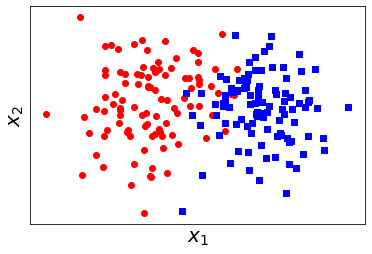

In [10]:
# Visualize generated data 
plt.scatter(X_1[:, 0], X_1[:, 1], c='red', marker='o', alpha=1)
plt.scatter(X_2[:, 0], X_2[:, 1], c='blue', marker='s', alpha=1)
plt.xticks([])
plt.yticks([])
plt.xlabel("$x_1$", fontsize = 20)
plt.ylabel("$x_2$", fontsize = 20)
plt.show()

In [11]:
X = np.concatenate((X_1, X_2), axis=0)
y = np.concatenate((-np.ones((N, 1)), np.ones((N,1))), axis=0)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [12]:
C_values = [1, 2, 3, 4, 5, 10, 30, 50]
train_accs = []
val_accs = []
best_val = 0
best_C = None

for C in C_values:
    model = KernelSVM(kernel='linear', C=C)
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    train_acc = accuracy_score(y_train, train_preds)
    val_acc = accuracy_score(y_val, val_preds)
    
    if val_acc > best_val:
        best_val = val_acc
        best_C = C 
        
    train_accs.append(train_acc)
    val_accs.append(val_acc)

print("Best accuracy on TEST SET: {} %".format(best_val * 100))
print("Best C: ", best_C)

Best accuracy on TEST SET: 97.5 %
Best C:  1


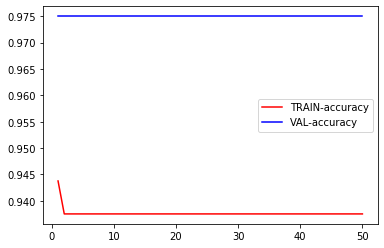

In [13]:
plt.plot(C_values, train_accs, label="TRAIN-accuracy", c='red')
plt.plot(C_values, val_accs, label="VAL-accuracy", c="blue")
plt.legend()
plt.show()

## 3. Non-Linear Classification With Kernel SVM

In [14]:
# Numbers of sample of each class 
N = 50

theta_pos = np.random.uniform(np.pi, 2 * np.pi, N)
theta_neg = np.random.uniform(np.pi, 0, N)

X_pos_x1 = (2 * np.cos(theta_pos) + 1).reshape(-1, 1)
X_pos_x2 = (2 * np.sin(theta_pos) + 0.4 * np.random.randn(N) + 0.4).reshape(-1, 1)
X_1 = np.concatenate((X_pos_x1, X_pos_x2), axis=1)

X_neg_x1 = (2 * np.cos(theta_neg) - 1).reshape(-1, 1)
X_neg_x2 = (2 * np.sin(theta_neg) + 0.5 * np.random.randn(N) - 0.5).reshape(-1, 1)
X_2 = np.concatenate((X_neg_x1, X_neg_x2), axis=1)

y_1 = -np.ones((1, N))
y_2 = np.ones((1, N))

X = np.concatenate((X_1, X_2), axis=0)
y = np.concatenate((y_1, y_2), axis=1).T

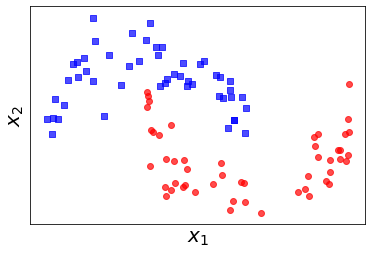

In [15]:
# Visualize generated data 
plt.scatter(X_1[:, 0], X_1[:, 1], c='red', marker='o', alpha=0.7)
plt.scatter(X_2[:, 0], X_2[:, 1], c='blue', marker='s', alpha=0.7)
plt.xticks([])
plt.yticks([])
plt.xlabel("$x_1$", fontsize = 20)
plt.ylabel("$x_2$", fontsize = 20)
plt.show()

### 3.1 SVM with RBF kernel

Using SVM in pylean_ml191: 
--------------------------


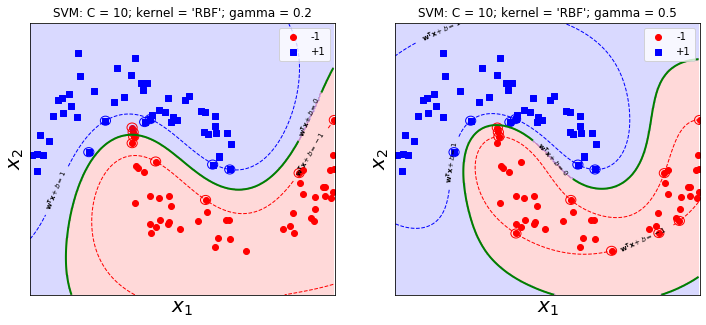

Using SVC in sklearn: 
----------------------


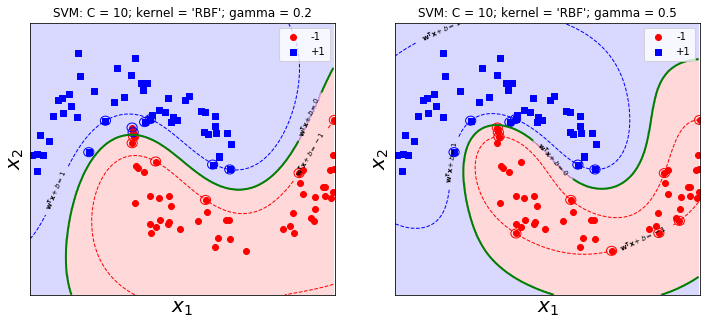

In [16]:
#------------ Visualize results in 2-D Dimensions -----------#
# Some settings 
step_size = 0.025
x_min = -3
x_max = 3
y_min = -3
y_max = 3

x_1 = np.arange(x_min, x_max, step_size)
x_2 = np.arange(y_min, y_max, step_size)

xx, yy = np.meshgrid(x_1, x_2)

xx1 = xx.ravel().reshape(xx.size, 1)
yy1 = yy.ravel().reshape(yy.size, 1)

X_grid = np.concatenate((xx1, yy1), axis=1)

# Some values of gamma, C to turning 
gammas = [0.2, 0.5]
C = 10

print("Using SVM in pylean_ml191: ")
print("--------------------------")

plt.figure(figsize=(12, 5))
for i, gamma in enumerate(gammas):
    model = KernelSVM("rbf", gamma = gamma, C = C)
    model.fit(X, y)
    z = model.predict(X_grid)
    z = np.reshape(z, xx.shape)
    S = model.support_vectors_
    tS = model.target_support_vectors_
    functional_distances = model.functional_distance(X_grid).reshape(xx.shape)


    ax = plt.subplot(1, 2, i + 1)
    plt.scatter(X_1[:, 0], X_1[:, 1], c='red', marker='o', alpha=1, label= "-1")
    plt.scatter(X_2[:, 0], X_2[:, 1], c='blue', marker='s', alpha=1, label= "+1")
    cs = plt.contourf(xx, yy, z, colors=['red', 'blue'], alpha = .15, levels=2)

    # Plot Decision Boundary
    cs_decision_boundary = plt.contour(xx, yy, functional_distances, [0],
                                       linewidths=2, colors='green')
    plt.clabel(cs_decision_boundary, [0], inline=True, 
               fmt='$\mathbf{w^Tx} + b = 0$', fontsize=7, colors='black')
    
    # Plot Two Margin Lines 
    cs_margin_plus = plt.contour(xx, yy, functional_distances - 1, [0],
                             linewidths=1, linestyles='--', colors='blue')
    plt.clabel(cs_margin_plus, [0], inline=True,
           fmt='$\mathbf{w^Tx} + b = 1$', fontsize=7, colors='black')

    cs_margin_minus = plt.contour(xx, yy, functional_distances + 1, [0],
                              linewidths=1, linestyles='--', colors='red')
    plt.clabel(cs_margin_minus, [0], inline=True,
           fmt='$\mathbf{w^Tx} + b = -1$', fontsize=7, colors='black')

    proxy = [plt.Rectangle((0,0), 1, 1, fc = pc.get_facecolor()[0]) 
        for pc in cs.collections]

    # Circling the points, which are support vectors
    for ms, ts in zip(S, tS):
        c = 'red' if ts == -1 else 'blue'
        circle = plt.Circle(ms, 0.1, color=c, fill = False)
        ax.add_artist(circle)
        
    plt.title("SVM: C = {}; kernel = 'RBF'; gamma = {}".format(C, gamma))
    plt.legend()
    plt.xticks(())
    plt.yticks(())
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel("$x_1$", fontsize = 20)
    plt.ylabel("$x_2$", fontsize = 20)

plt.show()

print("Using SVC in sklearn: ")
print("----------------------")
plt.figure(figsize=(12, 5))
for i, gamma in enumerate(gammas):
    model = SVC(kernel="rbf", gamma = gamma, C = C)
    model.fit(X, y)
    z = model.predict(X_grid)
    z = np.reshape(z, xx.shape)
    S = model.support_vectors_
    tS = model.predict(S)
    functional_distances = model.decision_function(X_grid).reshape(xx.shape)


    ax = plt.subplot(1, 2, i + 1)
    plt.scatter(X_1[:, 0], X_1[:, 1], c='red', marker='o', alpha=1, label= "-1")
    plt.scatter(X_2[:, 0], X_2[:, 1], c='blue', marker='s', alpha=1, label= "+1")
    cs = plt.contourf(xx, yy, z, colors=['red', 'blue'], alpha = .15, levels=2)

    # Plot Decision Boundary
    cs_decision_boundary = plt.contour(xx, yy, functional_distances, [0],
                                       linewidths=2, colors='green')
    plt.clabel(cs_decision_boundary, [0], inline=True, 
               fmt='$\mathbf{w^Tx} + b = 0$', fontsize=7, colors='black')
    
    # Plot Two Margin Lines 
    cs_margin_plus = plt.contour(xx, yy, functional_distances - 1, [0],
                             linewidths=1, linestyles='--', colors='blue')
    plt.clabel(cs_margin_plus, [0], inline=True,
           fmt='$\mathbf{w^Tx} + b = 1$', fontsize=7, colors='black')

    cs_margin_minus = plt.contour(xx, yy, functional_distances + 1, [0],
                              linewidths=1, linestyles='--', colors='red')
    plt.clabel(cs_margin_minus, [0], inline=True,
           fmt='$\mathbf{w^Tx} + b = -1$', fontsize=7, colors='black')

    proxy = [plt.Rectangle((0,0), 1, 1, fc = pc.get_facecolor()[0]) 
        for pc in cs.collections]

    # Circling the points, which are support vectors
    for ms, ts in zip(S, tS):
        c = 'red' if ts == -1 else 'blue'
        circle = plt.Circle(ms, 0.1, color=c, fill = False)
        ax.add_artist(circle)
        
    plt.title("SVM: C = {}; kernel = 'RBF'; gamma = {}".format(C, gamma))
    plt.legend()
    plt.xticks(())
    plt.yticks(())
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel("$x_1$", fontsize = 20)
    plt.ylabel("$x_2$", fontsize = 20)

plt.show()

### 3.2 SVM with Polynomial Kernel

Using SVM in pylean_ml191: 
--------------------------


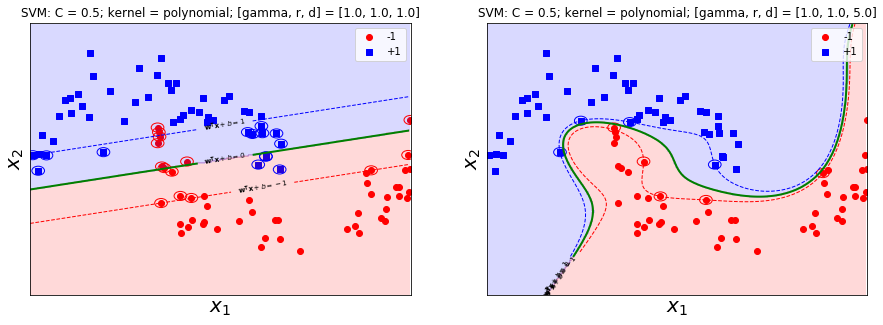

Using SVC in sklearn: 
----------------------


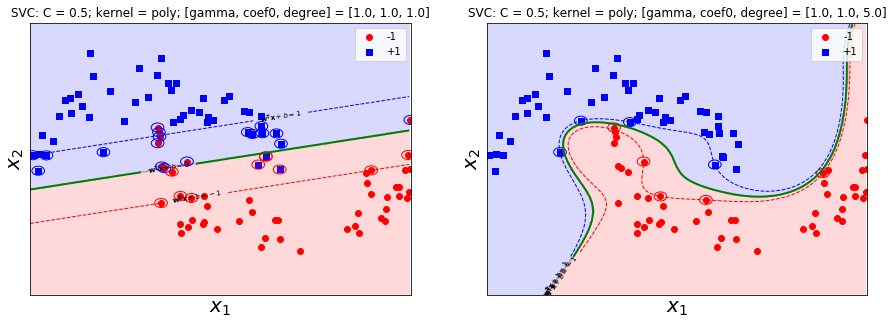

In [17]:
#------------ Visualize results in 2-D Dimensions -----------#
# Some settings 
step_size = 0.025
x_min = -3
x_max = 3
y_min = -3
y_max = 3

x_1 = np.arange(x_min, x_max, step_size)
x_2 = np.arange(y_min, y_max, step_size)

xx, yy = np.meshgrid(x_1, x_2)

xx1 = xx.ravel().reshape(xx.size, 1)
yy1 = yy.ravel().reshape(yy.size, 1)

X_grid = np.concatenate((xx1, yy1), axis=1)

# Some values of gamma, C to turning 
degrees = [1.0, 5.0]
C = 0.5
gamma = 1.0
r = 1.0


print("Using SVM in pylean_ml191: ")
print("--------------------------")
plt.figure(figsize=(15, 5))
for i, d in enumerate(degrees):
    model = KernelSVM("polynomial", gamma=gamma, C=C, r=r, d=d)
    model.fit(X, y)
    z = model.predict(X_grid)
    z = np.reshape(z, xx.shape)
    S = model.support_vectors_
    tS = model.target_support_vectors_
    functional_distances = model.functional_distance(X_grid).reshape(xx.shape)


    ax = plt.subplot(1, 2, i + 1)
    plt.scatter(X_1[:, 0], X_1[:, 1], c='red', marker='o', alpha=1, label= "-1")
    plt.scatter(X_2[:, 0], X_2[:, 1], c='blue', marker='s', alpha=1, label= "+1")
    cs = plt.contourf(xx, yy, z, colors=['red', 'blue'], alpha = .15, levels=2)

    # Plot Decision Boundary
    cs_decision_boundary = plt.contour(xx, yy, functional_distances, [0],
                                       linewidths=2, colors='green')
    plt.clabel(cs_decision_boundary, [0], inline=True, 
               fmt='$\mathbf{w^Tx} + b = 0$', fontsize=7, colors='black')
    
    # Plot Two Margin Lines 
    cs_margin_plus = plt.contour(xx, yy, functional_distances - 1, [0],
                             linewidths=1, linestyles='--', colors='blue')
    plt.clabel(cs_margin_plus, [0], inline=True,
           fmt='$\mathbf{w^Tx} + b = 1$', fontsize=7, colors='black')

    cs_margin_minus = plt.contour(xx, yy, functional_distances + 1, [0],
                              linewidths=1, linestyles='--', colors='red')
    plt.clabel(cs_margin_minus, [0], inline=True,
           fmt='$\mathbf{w^Tx} + b = -1$', fontsize=7, colors='black')

    proxy = [plt.Rectangle((0,0), 1, 1, fc = pc.get_facecolor()[0]) 
        for pc in cs.collections]

    # Circling the points, which are support vectors
    for ms, ts in zip(S, tS):
        c = 'red' if ts == -1 else 'blue'
        circle = plt.Circle(ms, 0.1, color=c, fill = False)
        ax.add_artist(circle)
        
    plt.title("SVM: C = {}; kernel = {}; [gamma, r, d] = [{}, {}, {}]".format(C, 'polynomial', gamma, r, d))
    plt.legend()
    plt.xticks(())
    plt.yticks(())
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel("$x_1$", fontsize = 20)
    plt.ylabel("$x_2$", fontsize = 20)

plt.show()


print("Using SVC in sklearn: ")
print("----------------------")
plt.figure(figsize=(15, 5))

for i, d in enumerate(degrees):
    model = SVC(kernel="poly", gamma=gamma, C=C, coef0=r, degree=d)
    model.fit(X, y)
    z = model.predict(X_grid)
    z = np.reshape(z, xx.shape)
    S = model.support_vectors_
    tS = model.predict(S)
    functional_distances = model.decision_function(X_grid).reshape(xx.shape)


    ax = plt.subplot(1, 2, i + 1)
    plt.scatter(X_1[:, 0], X_1[:, 1], c='red', marker='o', alpha=1, label= "-1")
    plt.scatter(X_2[:, 0], X_2[:, 1], c='blue', marker='s', alpha=1, label= "+1")
    cs = plt.contourf(xx, yy, z, colors=['red', 'blue'], alpha = .15, levels=2)

    # Plot Decision Boundary
    cs_decision_boundary = plt.contour(xx, yy, functional_distances, [0],
                                       linewidths=2, colors='green')
    plt.clabel(cs_decision_boundary, [0], inline=True, 
               fmt='$\mathbf{w^Tx} + b = 0$', fontsize=7, colors='black')
    
    # Plot Two Margin Lines 
    cs_margin_plus = plt.contour(xx, yy, functional_distances - 1, [0],
                             linewidths=1, linestyles='--', colors='blue')
    plt.clabel(cs_margin_plus, [0], inline=True,
           fmt='$\mathbf{w^Tx} + b = 1$', fontsize=7, colors='black')

    cs_margin_minus = plt.contour(xx, yy, functional_distances + 1, [0],
                              linewidths=1, linestyles='--', colors='red')
    plt.clabel(cs_margin_minus, [0], inline=True,
           fmt='$\mathbf{w^Tx} + b = -1$', fontsize=7, colors='black')

    proxy = [plt.Rectangle((0,0), 1, 1, fc = pc.get_facecolor()[0]) 
        for pc in cs.collections]

    # Circling the points, which are support vectors
    for ms, ts in zip(S, tS):
        c = 'red' if ts == -1 else 'blue'
        circle = plt.Circle(ms, 0.1, color=c, fill = False)
        ax.add_artist(circle)
        
    plt.title("SVC: C = {}; kernel = {}; [gamma, coef0, degree] = [{}, {}, {}]".format(C, 'poly', gamma, r, d))
    plt.legend()
    plt.xticks(())
    plt.yticks(())
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel("$x_1$", fontsize = 20)
    plt.ylabel("$x_2$", fontsize = 20)

plt.show()